In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
from scipy.stats import zscore 
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv('Countries-exercise.csv')
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [4]:
data.tail()

,name,Longitude,Latitude
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242
240,Zimbabwe,29.851441,-19.004204


In [5]:
data.shape

(241, 3)

In [6]:
data.dtypes

name          object
Longitude    float64
Latitude     float64
dtype: object

<AxesSubplot:>

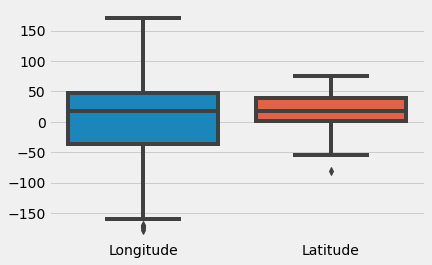

In [7]:
sns.boxplot(data=data)

In [15]:
a=data.copy()
a=a.iloc[:,1:]
a=a.apply(zscore)

In [26]:
a

,Longitude,Latitude
0,-1.171629,-0.175422
1,0.720657,0.628927
2,0.046226,-1.111849
3,-1.075368,0.039797
4,0.081187,0.904683
...,...,...
236,-2.593510,-1.166941
237,0.464368,-0.047553
238,0.151237,-1.742328
239,0.188681,-1.155809


In [19]:
from scipy.spatial.distance import cdist

E:\Anacondafiles\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


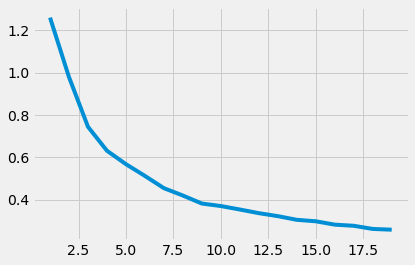

In [29]:
clusters=np.arange(1,20)
meanDistortion=[]
for i in clusters:
    model=KMeans(n_clusters=i)
    model.fit(a)
    predict=model.predict(a)
    meanDistortion.append(sum(np.min(cdist(a,model.cluster_centers_,'euclidean'),axis=1))/a.shape[0])
    
    
plt.plot(clusters,meanDistortion)

In [30]:
model=KMeans(n_clusters=3)
model.fit(a)
yhat=model.predict(a)

In [32]:
a['Group']=yhat

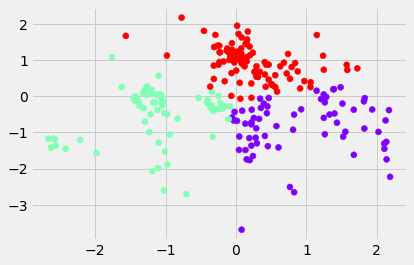

In [34]:
plt.scatter(a['Longitude'], a['Latitude'],c=a['Group'], cmap = 'rainbow')